<a href="https://colab.research.google.com/github/edsonportosilva/LPC/blob/master/Jupyter/Lab1/LPC-NotebookExperimento1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
 Laboratório de Princípios de Comunicações (LPC) 
 Notebook de auxílio ao guia de Experimentos 1
 Tema(s): Introdução ao GNU Radio. Séries de Fourier. Distorção.
 
 As práticas experimentais propostas no experimento 1 têm por objetivos:
 
 - Introduzir ao GNU Radio Companion como ferramenta para realização de experimentos em comunicações;
 - Simular e analisar séries de Fourier de sinais comuns;
 - Caracterizar distorções de canal. 
 ```

# Notebook de auxílio ao Guia de Experimentos 1

<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Representação-de-funções-periódicas-via-séries-de-Fourier" data-toc-modified-id="Representação-de-funções-periódicas-via-séries-de-Fourier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Representação de funções periódicas via séries de Fourier</a></span><ul class="toc-item"><li><span><a href="#Calculando-os-coeficientes-de-Fourier-analiticamente" data-toc-modified-id="Calculando-os-coeficientes-de-Fourier-analiticamente-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Calculando os coeficientes de Fourier analiticamente</a></span></li><li><span><a href="#Calculando-os-coeficientes-de-Fourier-via-integração-numérica" data-toc-modified-id="Calculando-os-coeficientes-de-Fourier-via-integração-numérica-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Calculando os coeficientes de Fourier via integração numérica</a></span><ul class="toc-item"><li><span><a href="#Aproximação-via-série-de-Fourier-para-a-onda-quadrada" data-toc-modified-id="Aproximação-via-série-de-Fourier-para-a-onda-quadrada-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Aproximação via série de Fourier para a onda quadrada</a></span></li><li><span><a href="#Aproximação-via-série-de-Fourier-para-a-onda-triangular" data-toc-modified-id="Aproximação-via-série-de-Fourier-para-a-onda-triangular-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Aproximação via série de Fourier para a onda triangular</a></span></li><li><span><a href="#Aproximação-via-série-de-Fourier-para-a-onda-dente-de-serra" data-toc-modified-id="Aproximação-via-série-de-Fourier-para-a-onda-dente-de-serra-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Aproximação via série de Fourier para a onda dente de serra</a></span></li></ul></li><li><span><a href="#Série-de-Fourier-para-um-sinal-arbitrário" data-toc-modified-id="Série-de-Fourier-para-um-sinal-arbitrário-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Série de Fourier para um sinal arbitrário</a></span></li><li><span><a href="#Reescrevendo-a-série-de-Fourier-na-sua-forma-harmônica" data-toc-modified-id="Reescrevendo-a-série-de-Fourier-na-sua-forma-harmônica-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Reescrevendo a série de Fourier na sua forma harmônica</a></span></li></ul></li><li><span><a href="#Distorção-de-sinais" data-toc-modified-id="Distorção-de-sinais-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distorção de sinais</a></span><ul class="toc-item"><li><span><a href="#Exemplos-de-distorção" data-toc-modified-id="Exemplos-de-distorção-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exemplos de distorção</a></span></li><li><span><a href="#Tipos-de-distorção" data-toc-modified-id="Tipos-de-distorção-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tipos de distorção</a></span></li><li><span><a href="#Condição-para-um-sinal-não-sofrer-distorção-ao-passar-por-um-sistema-linear-e-invariante-no-tempo-(LIT)" data-toc-modified-id="Condição-para-um-sinal-não-sofrer-distorção-ao-passar-por-um-sistema-linear-e-invariante-no-tempo-(LIT)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Condição para um sinal não sofrer distorção ao passar por um sistema linear e invariante no tempo (LIT)</a></span></li></ul></li><li><span><a href="#Energia,-potência-e-largura-de-banda" data-toc-modified-id="Energia,-potência-e-largura-de-banda-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Energia, potência e largura de banda</a></span><ul class="toc-item"><li><span><a href="#Potência-e-energia" data-toc-modified-id="Potência-e-energia-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Potência e energia</a></span></li><li><span><a href="#Escala-decibel" data-toc-modified-id="Escala-decibel-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Escala decibel</a></span></li><li><span><a href="#Ocupação-de-banda" data-toc-modified-id="Ocupação-de-banda-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ocupação de banda</a></span></li></ul></li></ul></div>

In [1]:
from IPython.core.pylabtools import figsize

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
# Carrega pacotes
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from numpy import cos, sin, arctan2, sqrt, log10
from scipy.signal import square, sawtooth
import pandas as pd

from IPython.display import Math, display
from sympy import lambdify

# configura notebook
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:,.2f}'.format

IPython_default = plt.rcParams.copy()
plt.rc('grid', color='k', linestyle='-', linewidth=0.5)
plt.rcParams['axes.grid'] = True

def symdisp(expr, var, unit=" "):
    """
    Display sympy expressions in Latex style.

    :param expr: expression in latex [string]
    :param var: sympy variable, function, expression.
    :param unit: string indicating unit of var [string]
    """
    display(Math(expr + sp.latex(var) + "\;" + "\mathrm{"+unit+"}"))
    
# Função para plot de funções do sympy
def symplot(t, F, interval, funLabel, xlabel="tempo [s]", ylabel=""):
    """
    Create plots of sympy symbolic functions.

    :param t: sympy variable
    :param F: sympy function F(t)
    :param interval: array of values of t where F should be evaluated [np.array]
    :funLabel: curve label be displayed in the plot [string].
    """
    fig = plt.figure()
    if type(F) == list:
        for indLabel, f in enumerate(F):
            plotFunc(t, f, interval, funLabel[indLabel], xlabel, ylabel)
    else:
        plotFunc(t, F, interval, funLabel, xlabel, ylabel)
    plt.grid(True)
    plt.close()
    return fig

def plotFunc(t, F, interval, funLabel, xlabel, ylabel):
    func = lambdify(
        t, F, modules=["numpy", {"Heaviside": lambda t: np.heaviside(t, 0)}]
    )
    f_num = func(interval)

    plt.plot(interval, f_num, label=funLabel)
    plt.legend(loc="upper right")
    plt.xlim([min(interval), max(interval)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [9]:
figsize(10, 3)

## Representação de funções periódicas via séries de Fourier

Seja a função $f(t)$ periódica com período fundamental $T$, isto é $f(t)=f(t+nT)$ para $n=1,2,3,...$, e absolutamente integrável num intervalo de comprimento $T$. Considerando que $f(t)$ admite representação em termos de uma série trigonométrica de Fourier, temos que

$$ 
\begin{equation}
f(t)=\frac{a_{0}}{2}+\sum_{n=1}^{\infty}\left[a_{n} \cos \left(2\pi t\frac{n}{T}\right)+b_{n} \sin \left(2\pi t\frac{n}{T}\right)\right] 
\end{equation}
$$

em que $a_n$ e $b_n$ são os coeficientes de Fourier da expansão de $f(t)$, calculados de acordo com as expressões

$$
\begin{equation}\label{coeff_an}
a_{n}=\frac{2}{T} \int_{T} f(t) \cos \left(2\pi t\frac{n}{T}\right) dt 
\end{equation}
$$

$$
\begin{equation}\label{coeff_bn}
b_{n}=\frac{2}{T} \int_{T} f(t) \sin \left(2\pi t\frac{n}{T}\right) dt.
\end{equation}
$$

Em particular, para os coeficientes associados ao nível DC do sinal ($f=0$), temos que

$$\begin{eqnarray}
a_{0}&=&\frac{2}{T} \int_{T} f(t) \cos(0) dt =\frac{2}{T} \int_{T} f(t) dt\nonumber\\
b_{0}&=&\frac{2}{T} \int_{T} f(t) \sin(0) dt = 0.\nonumber
\end{eqnarray}$$

Para revisitar o emprego das séries de Fourier na análise de sinais e sistemas, começamos gerando alguns sinais periódicos para em seguida determinar a sua composição espectral via cálculo dos coeficientes de Fourier.

### Calculando os coeficientes de Fourier analiticamente

Vamos utilizar algumas funções do `sympy` para calcular as expressões analíticas para os coeficientes da série de Fourier de cada sinal periódico $g(t)$. Primeiramente, vamos definir a função $g_T(t)$ que corresponde ao primeiro período da função $g(t)$, ou seja, $g_T(t) = g(t)$ no intervalo $[0,T]$, em que $T$ é o período fundamental da onda. 

A seguir temos um trecho que código que define $g_T(t)$ para cada uma das ondas mencionadas anteriormente (quadrada, triangular e dente de serra). Descomente a linha correspondente à respectiva forma de onda e rode o código na célula abaixo.

<IPython.core.display.Math object>

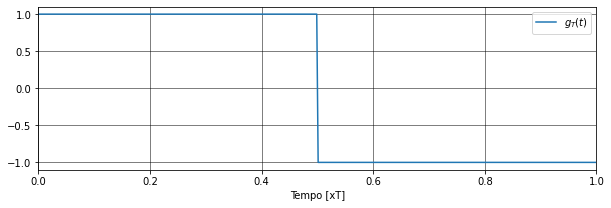

In [14]:
t, T = sp.symbols('t, T', real=True, nonnegative=True)
n = sp.symbols('n', integer=True, nonnegative=True)


gT = sp.Piecewise( (1, (t >= 0)&(t < T/2)), (-1, (t >= T/2)&(t <= T)) ) # primeiro período da onda quadrada
#gT = sp.Piecewise( (-1 + 4*t/T, (t >= 0)&(t < T/2)), (3 - 4*t/T, (t >= T/2)&(t <= T)) ) # primeiro período da onda triangular
#gT = -1 + 2*t/T  # primeiro período da onda dente de serra

symdisp('g_{T}(t) =', gT)

intervalo = np.linspace(0,1,400)
symplot(t, gT.subs({T:1}), intervalo, '$g_T(t)$', xlabel = 'Tempo [xT]')

Agora vamos calcular as expressões dos coeficientes de Fourier utilizando as integrais definidas nas equações $(\ref{coeff_an})$ e $(\ref{coeff_bn})$. Temos, então:

In [15]:
an = (2/T) * sp.integrate( gT * sp.cos(2*sp.pi*n*t/T) , (t, 0, T) )
bn = (2/T) * sp.integrate( gT * sp.sin(2*sp.pi*n*t/T) , (t, 0, T) )

an = an.simplify()
bn = bn.simplify()

symdisp('a_n =', an)
symdisp('b_n =', bn)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

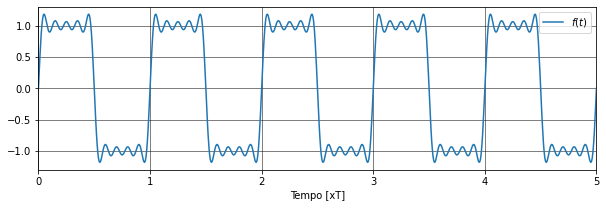

In [19]:
ncoeffs = 10 
an_vals = np.zeros((ncoeffs,1))
bn_vals = np.zeros((ncoeffs,1))

f = 0
for c in range(10):
    an_vals[c] = sp.N(an.subs({n:c}),3)
    bn_vals[c] = sp.N(bn.subs({n:c}),3)
    f += an.subs({n:c})*sp.cos(2*sp.pi*c*t/T) + bn.subs({n:c})*sp.sin(2*sp.pi*c*t/T)

symdisp('f(t) \\approx ', f)

intervalo = np.linspace(0,5,800)
symplot(t, f.subs({T:1}), intervalo, '$f(t)$', xlabel = 'Tempo [xT]')

In [8]:
# Gera tabela com os coeficientes an, bn
pd.DataFrame(np.hstack((an_vals, bn_vals)), columns=["$a_{n}$", "$b_{n}$"]).T

,0,1,2,3,4,5,6,7,8,9
$a_{n}$,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
$b_{n}$,0.00,1.27,0.00,0.42,0.00,0.25,0.00,0.18,0.00,0.14


### Calculando os coeficientes de Fourier via integração numérica

De maneira alternativa, vamos definir uma função simples para calcular numericamente os coeficientes $a_n$ e $b_n$ da série de Fourier para uma função periódica $f(t)$ qualquer (veja um resumo sobre o método de integração `numpy.trapz` em https://numpy.org/doc/stable/reference/generated/numpy.trapz.html).

Inicialmente, vamos gerar versões discretas para as ondas quadrada, triangular e dente de serra.

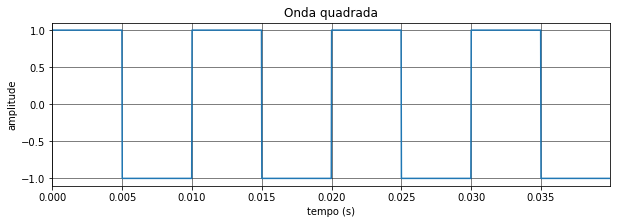

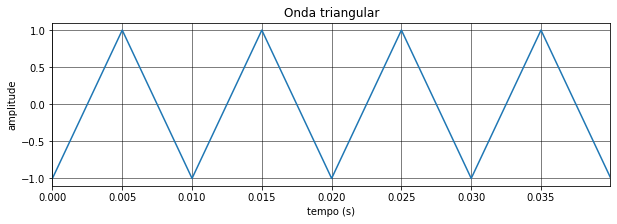

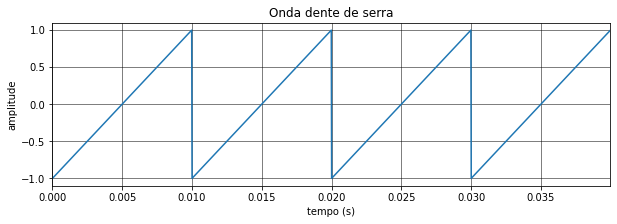

In [53]:
# Geração de sinais periódicos

f0 = 100     # Frequência fundamental
fa = 400*f0  # Frequência de amostragem

t    = np.arange(0, 40e-3, 1/fa)
π    = np.pi

A    = 1     # amplitude
ϕ    = 0*π/4 # fase

# gera sinais periódicos
quad   = A*square(2*π*f0*t + ϕ)                # onda quadrada com frequência fundamental f0 e phase inicial ϕ
triang = A*sawtooth(2*π*f0*t + ϕ, width = 0.5) # onda triangular com frequência fundamental f0 e phase inicial ϕ
dente  = A*sawtooth(2*π*f0*t + ϕ)              # onda dente de serra com frequência fundamental f0 e phase inicial ϕ

plt.figure()
plt.plot(t, quad)
plt.ylim(quad.min(0)-0.1, quad.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.title('Onda quadrada')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')

plt.figure()
plt.plot(t, triang)
plt.ylim(triang.min(0)-0.1, triang.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.title('Onda triangular')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')

plt.figure()
plt.plot(t, dente)
plt.ylim(dente.min(0)-0.1, dente.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.title('Onda dente de serra')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude');

In [54]:
def fourierCoeff(t, f, T, ncoeffs):
    """
     t  : vetor de instantes de tempo contendo pelo menos um período completo da função [segundos]
     f  : vetor de valores de f(t) calculados para cada instante em t 
     T  : período fundamental de f [segundos]
     ncoeffs: número de coeficiente de Fourier desejado [número inteiro maior que zero]
     
     an : coeficiente an
     bn : coeficiente bn
     
    """    
    dt = t[1]-t[0]          # período de amostragem [passo de integração]
    N  = int(np.ceil(T/dt)) # número de amostras correspondente a um período completo da onda   
    π  = np.pi
    
    an = np.zeros((ncoeffs, 1)) # coeficientes an
    bn = np.zeros((ncoeffs, 1)) # coeficientes bn
    
    # cálculo dos coeficientes an e bn utilizando o método trapezoidal de integração numérica     
    for n in range(0, ncoeffs):# calcula coeficientes de Fourier para n=0 até n=ncoeffs-1
        an[n] = np.trapz(f[0:N]*cos(2*π*t[0:N]*n/T), dx=dt)
        bn[n] = np.trapz(f[0:N]*sin(2*π*t[0:N]*n/T), dx=dt)         
    
    an = an*2/T
    bn = bn*2/T
    
    return an, bn

Agora que a função ``an, bn = fourierCoeff(t, f, T, ncoeffs)`` foi definida, podemos utilizá-la para calcular os coeficientes de Fourier de sinais periódicos quaisquer. 

No que segue, utilizaremos ``fourierCoeff`` para calcular os coeficientes de fourier das formas de onda geradas anteriormente.

#### Aproximação via série de Fourier para a onda quadrada

Primeiramente, vamos calcular os coeficientes da série de Fourier da onda quadrada:

,0,1,2,3,4,5,6,7,8,9
$a_{n}$,0.00,0.01,-0.00,0.01,-0.00,0.01,-0.00,0.01,-0.00,0.01
$b_{n}$,0.00,1.27,-0.00,0.42,-0.00,0.25,-0.00,0.18,-0.00,0.14


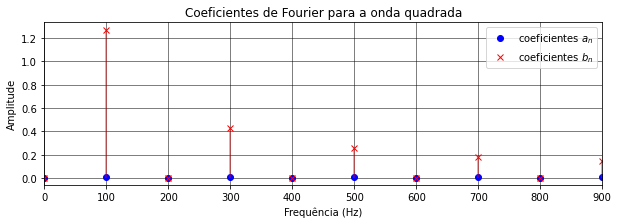

In [55]:
# Coeficientes de Fourier da onda quadrada

ncoeffs = 10  # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula coeficientes de Fourier
quad_an, quad_bn = fourierCoeff(t, quad , 1/f0, ncoeffs)

# plota gráfico
xf = f0*np.arange(0, ncoeffs) # frequências de cada componente harmônico

plt.figure()
plt.plot(xf, quad_an,'bo',label = 'coeficientes $a_{n}$')
plt.vlines(xf, 0, quad_an,'b', alpha=0.5)
plt.plot(xf, quad_bn,'rx',label = 'coeficientes $b_{n}$')
plt.vlines(xf, 0, quad_bn,'r', alpha=0.5)

plt.title('Coeficientes de Fourier para a onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
#plt.ylim(-2,2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')

# Gera tabela com os coeficientes an, bn
pd.DataFrame(np.hstack((quad_an, quad_bn)), columns=["$a_{n}$", "$b_{n}$"]).T

Agora, vamos construir uma aproximação da onda quadrada somando um número finito de seus componentes harmônicos. Para diferentes valores de `ncoeffs`, execute a célula abaixo e observe o gráfico gerado.

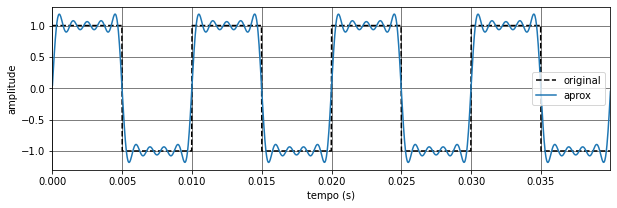

In [56]:
# Aproximação da onda quadrada via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
quad_aprox = np.zeros(len(t))
for n in range(0,ncoeffs):
    if n != 0:
        quad_aprox += quad_an[n]*cos(2*π*n*f0*t) + quad_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        quad_aprox += quad_an[n]/2

plt.plot(t, quad,'k--',label = 'original')        
plt.plot(t,quad_aprox,label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

#### Aproximação via série de Fourier para a onda triangular

,0,1,2,3,4,5,6,7,8,9
$a_{n}$,0.00,-0.81,0.00,-0.09,0.00,-0.03,0.00,-0.01,0.00,-0.01
$b_{n}$,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


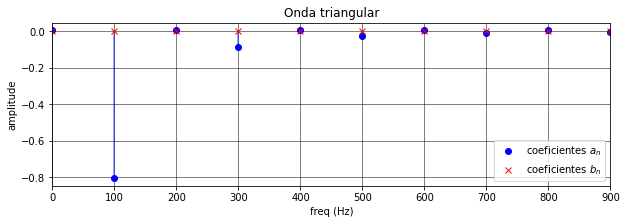

In [57]:
# Coeficientes de Fourier da onda triangular

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

xf = f0*np.arange(0, ncoeffs) # frequências de cada componente harmônico

# calcula coeficientes de Fourier
triang_an, triang_bn = fourierCoeff(t, triang , 1/f0, ncoeffs)

# plota gráfico
plt.figure()
plt.plot(xf, triang_an,'bo',label = 'coeficientes $a_{n}$')
plt.vlines(xf, 0, triang_an,'b', alpha=0.5)
plt.plot(xf, triang_bn,'rx',label = 'coeficientes $b_{n}$')
plt.vlines(xf, 0, triang_bn,'r', alpha=0.5)

plt.title('Onda triangular')
plt.legend()
plt.xlim(0,xf.max(0))
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')

# Gera tabela com os coeficientes an, bn
pd.DataFrame(np.hstack((triang_an, triang_bn)), columns=["$a_{n}$", "$b_{n}$"]).T

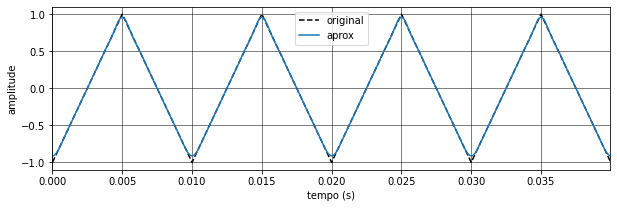

In [58]:
# Aproximação da onda triangular via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
triang_aprox = np.zeros(len(t))
for n in range(0,ncoeffs):
    if n != 0:
        triang_aprox += triang_an[n]*cos(2*π*n*f0*t) + triang_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        triang_aprox += triang_an[n]/2

plt.plot(t, triang,'k--',label = 'original')        
plt.plot(t,triang_aprox,label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

#### Aproximação via série de Fourier para a onda dente de serra

,0,1,2,3,4,5,6,7,8,9
$a_{n}$,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
$b_{n}$,0.00,-0.64,-0.32,-0.21,-0.16,-0.13,-0.11,-0.09,-0.08,-0.07


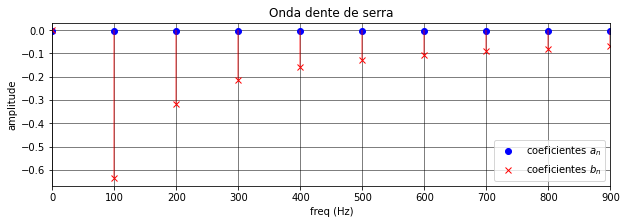

In [59]:
# Coeficientes de Fourier da onda dente de serra

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

xf = f0*np.arange(0, ncoeffs) # frequências de cada componente harmônico

# calcula coeficientes de Fourier
dente_an, dente_bn = fourierCoeff(t, dente , 1/f0, ncoeffs)

# plota gráficos
plt.figure()
plt.plot(xf, dente_an,'bo',label = 'coeficientes $a_{n}$')
plt.vlines(xf, 0, dente_an,'b', alpha=0.5)
plt.plot(xf, dente_bn,'rx',label = 'coeficientes $b_{n}$')
plt.vlines(xf, 0, dente_bn,'r', alpha=0.5)

plt.title('Onda dente de serra')
plt.legend()
plt.xlim(0,xf.max(0))
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')

# Gera tabela com os coeficientes an, bn
pd.DataFrame(np.hstack((dente_an, dente_bn)), columns=["$a_{n}$", "$b_{n}$"]).T

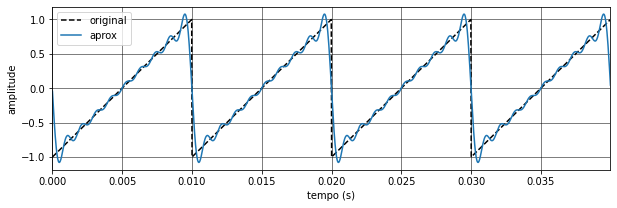

In [60]:
# Aproximação da onda dente de serra via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
dente_aprox = np.zeros(len(t))
for n in range(0,ncoeffs):
    if n != 0:
        dente_aprox += dente_an[n]*cos(2*π*n*f0*t) + dente_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        dente_aprox += dente_an[n]/2

plt.plot(t, dente,'k--',label = 'original')        
plt.plot(t, dente_aprox,label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

### Série de Fourier para um sinal arbitrário

Utilizando a mesma ferramenta de cálculo numérico dos coeficientes de Fourier, podemos calcular os coeficientes de um sinal arbitrário. Por exemplo, vamos considerar o seguinte sinal:

$$
f(t) = |\mathrm{sen}(2πf_0t) - \mathrm{sen}(3πf_0t)^2|
$$

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
$a_{n}$,1.51,-0.15,-0.26,-0.19,0.00,-0.11,0.05,-0.02,0.02,-0.01,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
$b_{n}$,0.00,0.57,0.27,0.10,-0.24,0.04,0.01,-0.03,0.00,-0.04,...,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00


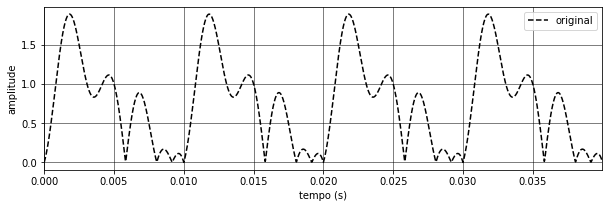

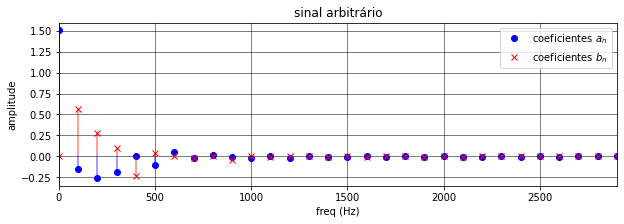

In [61]:
# Coeficientes de Fourier para um sinal arbitrário
π = np.pi
sig = np.abs(np.sin(2*π*f0*t) + np.sin(3*π*f0*t)**2)


plt.figure()
plt.plot(t, sig,'k--',label = 'original')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

ncoeffs = 30 # número de componentes harmônicos (incluindo componente dc, n=0)

xf = f0*np.arange(0, ncoeffs) # frequências de cada componente harmônico

# calcula coeficientes de Fourier
sig_an, sig_bn = fourierCoeff(t, sig , 1/f0, ncoeffs)

# plota gráficos
plt.figure()
plt.plot(xf, sig_an,'bo',label = 'coeficientes $a_{n}$')
plt.vlines(xf, 0, sig_an,'b', alpha=0.5)
plt.plot(xf, sig_bn,'rx',label = 'coeficientes $b_{n}$')
plt.vlines(xf, 0, sig_bn,'r', alpha=0.5)

plt.title('sinal arbitrário')
plt.legend()
plt.xlim(0,xf.max(0))
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')

# Gera tabela com os coeficientes an, bn
pd.DataFrame(np.hstack((sig_an, sig_bn)), columns=["$a_{n}$", "$b_{n}$"]).T

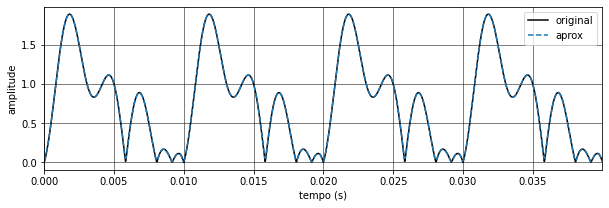

In [62]:
# Aproximação de um sinal arbitrário via somatório de harmônicas da série de Fourier

ncoeffs = 30 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
sig_aprox = np.zeros(len(t))
for n in range(0,ncoeffs):
    if n != 0:
        sig_aprox += sig_an[n]*cos(2*π*n*f0*t) + sig_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        sig_aprox += sig_an[n]/2

plt.plot(t, sig,'k',label = 'original')        
plt.plot(t, sig_aprox,'--',label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

### Reescrevendo a série de Fourier na sua forma harmônica

Podemos expressar a série de Fourier de maneira simplificada utilizando a sua forma harmônica, utilizando apenas a função cosseno para representar os componentes harmônicos da função.

$$f(t)=A_{0} + \sum_{n=1}^{\infty} A_{n}\cos \left(2\pi t \frac{n}{P}-\theta_{n}\right)$$

em que 

$$A_{0}=\frac{a_{0}}{2},\; A_{n}=\sqrt{a_{n}^{2}+b_{n}^{2}} \; \text { para } n \geq 1, \; \theta_{n}=\arctan \left(\frac{b_{n}}{a_{n}}\right)$$

Esta representação é útil porque nos permite determinar diretamente a energia associada a cada componente de frequência do sinal através dos coeficientes $A_{n}$, como veremos a seguir.

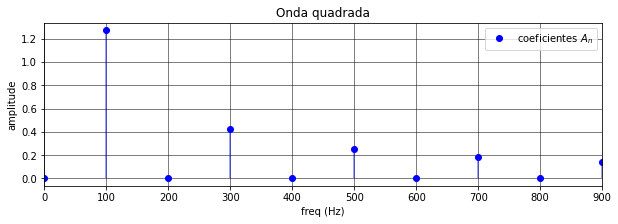

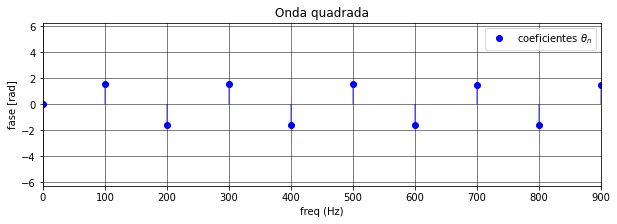

In [63]:
# Aproximação da onda quadrada via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

xf = f0*np.arange(0, ncoeffs) # frequências de cada componente harmônico

# calcula coeficientes de Fourier
quad_an, quad_bn = fourierCoeff(t, quad , 1/f0, ncoeffs)
        
# calcula coeficientes An e fases Θn da forma harmônica da série de Fourier a partir dos pares (an, bn).
An = np.zeros((ncoeffs,1))
θn = np.zeros((ncoeffs,1))

for n in range(0, ncoeffs): 
    if n != 0:
        An[n] = sqrt(quad_an[n]**2 + quad_bn[n]**2)
        θn[n] = arctan2(quad_bn[n], quad_an[n])      # calcula arctan(bn/an)                    
    else:
        An[n] = quad_an[n]/2        

# plota gráficos
plt.figure()
plt.plot(xf, An,'bo',label = 'coeficientes $A_{n}$')
plt.vlines(xf, 0, An,'b', alpha=0.5)

plt.title('Onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')      

plt.figure()
plt.plot(xf, θn,'bo',label = 'coeficientes $θ_{n}$')
plt.vlines(xf, 0, θn,'b', alpha=0.5)

plt.title('Onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
plt.ylim(-2*π ,2*π)
plt.xlabel('freq (Hz)')
plt.ylabel('fase [rad]');

Agora vamos obter uma aproximação do sinal original com um somatório de harmônicos

,0,1,2,3,4,5,6,7,8,9
$a_{n}$,0.00,0.01,-0.00,0.01,-0.00,0.01,-0.00,0.01,-0.00,0.01
$b_{n}$,0.00,1.27,-0.00,0.42,-0.00,0.25,-0.00,0.18,-0.00,0.14
$A_{n}$,0.00,1.27,0.00,0.42,0.00,0.25,0.00,0.18,0.00,0.14
$θ_{n}$ [rad],0.00,1.56,-1.59,1.55,-1.60,1.53,-1.62,1.52,-1.63,1.50


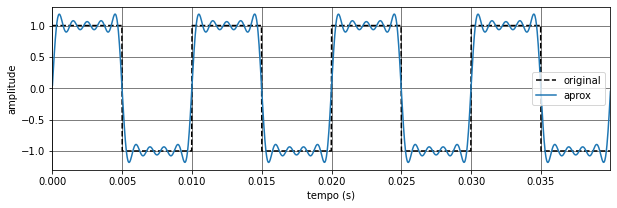

In [64]:
# calcula aproximação do sinal com um somatório finito de harmônicos
quad_aprox = np.zeros(len(t))
for n in range(0,ncoeffs):
    if n != 0:
        quad_aprox += An[n]*cos(2*π*n*f0*t - θn[n]) # soma n-ésimo componente harmônico                                 
    else:
        quad_aprox += An[n]        
        
plt.figure()
plt.plot(t, quad,'k--',label = 'original')        
plt.plot(t,quad_aprox,label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend()

# Gera tabela com os coeficientes an, bn, An e θn
pd.DataFrame(np.hstack((quad_an, quad_bn, An, θn)), columns=["$a_{n}$", "$b_{n}$", "$A_{n}$", "$θ_{n}$ [rad]"]).T

## Distorção de sinais

O conceito de *distorção* é utilizado em diversas áreas da engenharia elétrica, sendo particulamente importante em processamento de sinais e comunicações. 

Num sistema de comunicação, sinais são utilizados para transmitir informação. Entretanto, estes sinais estão sujeitos a diversos tipos de distorção que podem acontecer no canal de comunicação, ou seja, no percurso percorrido pelo sinal entre transmissor e receptor. Portanto, a informação transmitida por um sinal pode ser comprometida devido à diversos tipos de distorções podem modificar a sua forma. Portanto, um dos fatores que influenciam o desempenho de um sistema de comunicações é a presença de efeitos distorcivos no canal que afetem os sinais utilizados na comunicação.

### Exemplos de distorção

Diz-se que um sinal sofreu distorção **quando a sua forma original foi modificada, excetuando-se os casos em que tal modificação corresponde apenas a uma mudança de escala de amplitude, ou a um atraso no tempo**, que não alteram a forma de nenhum sinal. 

**Exemplo 1:** $y(t) = 2x(t-t_0)$. A forma de onda de $x(t)$ não é distorcida.

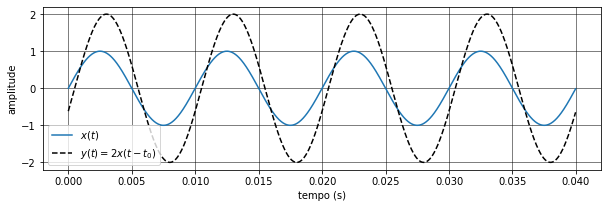

In [65]:
# Exemplo 1: y(t) não é uma versão distorcida de x(t)
t0 = 5e-4
x = sin(2*π*f0*t)
y = 2*sin(2*π*f0*(t-t0))

plt.figure()
plt.plot(t,x,label = '$x(t)$');
plt.plot(t,y,'k--',label = '$y(t)=2x(t-t_0)$');
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

**Exemplo 2:** $y(t) = x(t)+0.25x(t-t_0)$. A forma de onda de $y(t)$ é uma versão distorcida de $x(t)$.

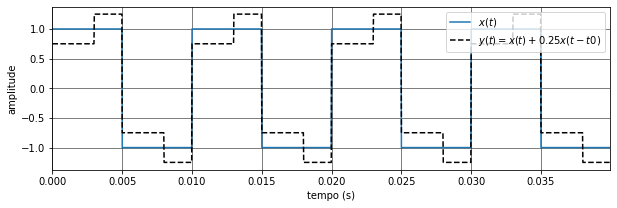

In [66]:
# Exemplo 3:  y(t) é a saída de um sistema LIT com x(t) aplicado na entrada.
#             y(t) é uma versão distorcida de x(t) (distorção linear)

t0 = 3e-3
x = square(2*π*f0*t) 
y = square(2*π*f0*t)  + 0.25*square(2*π*f0*(t-t0))

plt.figure()
plt.plot(t,x,label = '$x(t)$');
plt.plot(t,y,'k--',label = '$y(t) = x(t) + 0.25x(t-t0)$');
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend(loc='upper right');
plt.xlim(min(t), max(t));

**Exemplo 3:** $y(t) = [x(t)]^5$. A forma de onda de $y(t)$ é uma versão distorcida de $x(t)$.

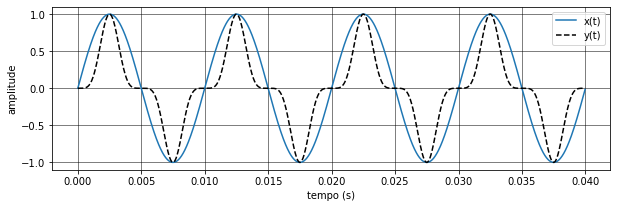

In [67]:
# Exemplo 3:  y(t) é uma função não-linear de x(t)
#             y(t) é uma versão distorcida de x(t) (distorção não-linear)

x = sin(2*π*f0*t)
y = x**5

plt.figure()
plt.plot(t,x,label = 'x(t)');
plt.plot(t,y,'k--',label = 'y(t)');
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

### Tipos de distorção

Distorções podem ser classificadas em dois tipos básicos:

- **Distorções lineares**: causadas por operações lineares sofridas pelo sinal. Quando analisadas no domínio da frequência, distorções lineares podem ser classificadas em

    - *Distorções de amplitude*: ocorrem devido a **alterações na amplitude dos componentes de frequência do sinal (i.e. diferentes componentes de frequência sofrem alterações de amplitudes distintas)**. Exemplo: ao passar um sinal por um filtro passa-baixas, componentes de alta frequência serão atenuados causando uma distorção de amplitude do sinal na saída com relação ao sinal na entrada do filtro (suavização do sinal na saída do filtro).
    - *Distorções de fase*: ocorrem devido a **alterações na fase dos componentes de frequência do sinal (i.e. diferentes componentes de frequência sofrem alterações de fase distintas)**.

- **Distorções não-lineares**: causadas por operações não-lineares sofridas pelo sinal. Uma característica que distingue distorções não-lineares das distorções lineares é que as primeiras são as únicas capazes de gerar novos componentes de frequência no sinal distorcido em comparação ao sinal original. Portanto, o surgimento de novos componentes harmônicos no sinal distorcido é um indicativo de que trata-se de uma distorção não-linear. 

Veja no exempo a seguir que, observando os coeficientes da série de Fourier $(a_{n}^{(x)},b_{n}^{(x)})$ do sinal $x(t)=\mathrm{sen}(t)$ e os coeficientes $(a_{n}^{(y)},b_{n}^{(y)})$ obtidos para sinal distorcido $y(t) = x^5(t)$, nota-se que o terceiro e o quinto harmônicos, ausentes no espectro de frequências de $x(t)$, agora aparecem no espectro de $y(t)$.

In [68]:
# Aplicando uma função não-linear ao sinal e observando o que ocorre com os coeficientes dos harmônicos

ncoeffs = 6 # número de componentes harmônicos (incluindo componente dc, n=0)

x = sin(2*π*f0*t)
y = x**5

# calcula coeficientes de Fourier de x e y
x_an, x_bn = fourierCoeff(t, x , 1/f0, ncoeffs)
y_an, y_bn = fourierCoeff(t, y , 1/f0, ncoeffs)
 
# Gera tabela com os coeficientes an, bn dos sinais x e y
pd.DataFrame(np.hstack((x_an, x_bn, y_an, y_bn)), columns=["$a_{n}^{(x)}$", "$b_{n}^{(x)}$",\
                                                           "$a_{n}^{(y)}$","$b_{n}^{(y)}$"]).T

,0,1,2,3,4,5
$a_{n}^{(x)}$,0.00,0.00,0.00,0.00,0.00,0.00
$b_{n}^{(x)}$,0.00,1.00,-0.00,-0.00,-0.00,-0.00
$a_{n}^{(y)}$,0.00,0.00,0.00,0.00,0.00,0.00
$b_{n}^{(y)}$,0.00,0.62,-0.00,-0.31,-0.00,0.06


### Condição para um sinal não sofrer distorção ao passar por um sistema linear e invariante no tempo (LIT)

As duas operações lineares que não distorcem um sinal estão resumidas em

$$\begin{equation}
y(t)=Gx(t-\tau).
\label{eq1}
\end{equation}$$

Logo, $y(t)$ conserva a mesma forma do sinal $x(t)$. Podemos considerar $y(t)$ em $\eqref{eq1}$ como sendo a saída de um sistema LIT, cuja resposta ao impulso é $h(t)=G\delta(t-\tau)$, ao aplicar-se o sinal $x(t)$ na sua entrada. Analisando $\eqref{eq1}$ no domínio da frequência, temos

$$\begin{align}
Y(f)&=Ge^{-j2\pi f \tau}X(f)\\ \\
Y(f)&=H(f)X(f), \text { com } H(f) = Ge^{-j2\pi f \tau}.
\label{eq2} \\
\end{align}$$

Note que a resposta em amplitude de $H(f)$ é constante $|H(f)|=G$ para todo $f$ (ou seja, trata-se de um filtro passa-tudo) e a resposta em fase $\angle H(f)=-2\pi f \tau$ é uma função linear de $f$. Portanto, como $H(f)$ representa **o único sistema LIT que não distorcerá o sinal de entrada**, se um sistema LIT qualquer não possuir resposta em frequência na forma expressa na $\eqref{eq2}$, naturalmente $y(t)$ será uma versão distorcida de $x(t)$.

Na prática, $x(t)$ não possui largura de banda infinita. Logo, para que $y(t)$ não seja uma versão distorcida de $x(t)$ é necessário apenas que as condições $|H(f)|=G$ e $\angle H(f)=-2\pi f \tau$  sejam satisfeitas dentro do intervalo de frequências em que $x(t)$ está contido.


**Verificação para o caso de sinais periódicos**:

Assuma que o sinal $x(t)$ é periódico e admite representação em termos de uma série de Fourier, então

$$
\begin{equation}
x(t)=A_{0} + \sum_{n=1}^{\infty} A_{n}\cos \left(2\pi n f_0 t-\theta_{n}\right) 
\label{eq3}
\end{equation}
$$

em que $f_0 = 1/P$. Logo, considerando a relação entre $x(t)$ e $y(t)$ dada pela $\eqref{eq1}$ temos

$$\begin{align}
y(t)&=GA_{0} + \sum_{n=1}^{\infty} GA_{n}\cos \left[2\pi n f_0 (t-\tau) -\theta_{n}\right]\\
y(t)&=GA_{0} + \sum_{n=1}^{\infty} GA_{n}\cos \left[2\pi n f_0 t -2\pi n f_0 \tau  -\theta_{n}\right]\\
y(t)&=GA_{0} + \sum_{n=1}^{\infty} GA_{n}\cos \left[2\pi n f_0 t -\theta_{n} + \Delta \theta\right] \label{eq4}
\end{align}$$

Desse modo, ao compararmos amplitude e fase dos componentes harmônicos em $\eqref{eq3}$ e $\eqref{eq4}$, conclui-se que para que $y(t)=h(t)\ast x(t)$ não seja uma versão distorcida de $x(t)$, todos os componentes de frequência de $x(t)$ devem sofrer o mesmo ganho $G$ (ou atenuação, se $|G|<1$) e o desvio de fase $\Delta \theta$ gerado pelo atraso $\tau$ deve ser linear com relação à frequência $\Delta \theta = (-2\pi f_0 \tau)n$, ou seja, o desvio de fase do $n$-ésimo componente harmônico tem que ser $n$ vezes o desvio de fase do componente fundamental, o que está de acordo com $\eqref{eq2}$ 

## Energia, potência e largura de banda


Três grandezas importantes para a caracterizarização de sinais são: energia, potência e largura de banda. Para que possamos entender a relação entre essas grandezas e como podemos determiná-las para um dado sinal, vamos revisitar suas definições formais e aplicar esses conceitos aos sinais que estamos analisando.

### Potência e energia

Na tabela a seguir tem-se um resumo das expressões matemáticas definindo energia e potência para sinais definidos no tempo contínuo e no tempo discreto:

$$
\begin{array}{|l|l|l|}\hline
\text { Propriedade } & \text { Tempo contínuo } & \text { Tempo discreto } \\
\hline \text { Energia } & E_{x}=\int_{-\infty}^{\infty}|x(t)|^{2} dt <\infty & E_{x}=\sum_{n=-\infty}^{\infty}|x[n]|^{2}<\infty \\
\hline \text { Potência } & P_{x}=\lim _{T \rightarrow \infty} \frac{1}{2 T} \int_{-T}^{T}|x(t)|^{2} dt<\infty & P_{x}=\lim _{N \rightarrow \infty} \frac{1}{2 N+1} \sum_{n=-N}^{N}|x[n]|^{2}<\infty\\\hline
\end{array}
$$

Perceba que se o sinal tiver duração infinita ($-\infty<t<\infty$ ou $-\infty<n<\infty$) as expressões podem divergir, de forma que para alguns tipos de sinais estas grandezas não serão bem definidas. Um exemplo simples é o caso de uma onda senoidal de duração infinita $s(t)=A\sin(2\pi ft + \theta)$, o qual possui energia infinita $E_s = \infty$ e potência finita $P_s = A^2/2$.

Os sinais que geramos numa simulação numérica são sempre discretos e de duração finita e, portanto, para esses sinais os somatórios que definem energia e potência são sempre finitos. Vamos calcular a potência e a energia da onda quadrada de acordo com as expressões utilizadas para sinais no tempo discreto:

In [69]:
# Cálculo da energia
E_quad = np.sum(abs(quad)**2)

# Cálculo da potência
N = len(quad)
P_quad = np.sum(abs(quad)**2)/N

print('Energia  = %3.2f unidades de energia' %(E_quad))
print('Potência = %3.2f unidades de potência' %(P_quad))

Energia  = 1600.00 unidades de energia
Potência = 1.00 unidades de potência


Agora vamos calcular a potência da aproximação da onda quadrada obtida via série de Fourier:

In [70]:
# Cálculo da energia
E_quad_aprox = np.sum(abs(quad_aprox)**2)

# Cálculo da potência
N = len(quad)
P_quad_aprox = np.sum(abs(quad_aprox)**2)/N

# Cálculo da potência pela soma da potência individual de cada componente harmônico 
P_harm = np.sum(abs(An)**2)/2

print('Energia  = %3.2f unidades de energia' %(E_quad_aprox))
print('Potência = %3.2f unidades de potência' %(P_quad_aprox))
print('Soma das potências dos componentes harmônicos da série: %2.2f unidades de potência' %(P_harm))

Energia  = 1535.10 unidades de energia
Potência = 0.96 unidades de potência
Soma das potências dos componentes harmônicos da série: 0.96 unidades de potência


Perceba que os valores tanto de energia quanto de potência do sinal original e do sinal aproximado pela série de Fourier estão muito próximos, como esperado.

Podemos visualizar como a potência do sinal se distribui no domínio da frequência plotando o gráfico da potência de cada componente harmônico em função da frequência.

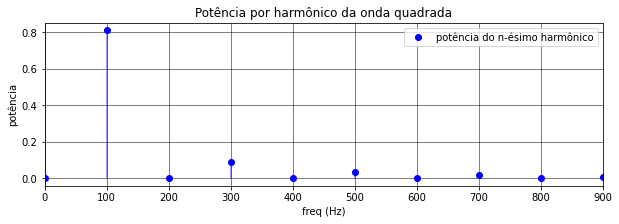

In [71]:
# plota gráficos
plt.figure()
plt.plot(xf, (abs(An)**2)/2,'bo',label = 'potência do n-ésimo harmônico')
plt.vlines(xf, 0, (abs(An)**2)/2,'b', alpha=0.5)

plt.title('Potência por harmônico da onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
#plt.ylim(-0.1,1)
plt.xlabel('freq (Hz)')
plt.ylabel('potência');

### Escala decibel

Uma forma convencional de apresentar gráficos de potência consiste em utilizar a escala de decibel (dB) no eixo y. Uma medida em dB é sempre um valor comparativo entre uma grandeza qualquer e uma grandeza de referência. Tal comparação é dada pela expressão a seguir:

$$ P_{\text{dBx}} = 10\log_{10}\left[\frac{P}{P_{x}}\right]$$

ou, equivalentemente

$$ P = P_{x}10^{\left(P_{\text{dBx}}/10\right)}.$$

Na prática, o procedimento mais comum é comparar os valores de potência de um dado sinal com um valor de referência, geralmente 1 mW ou 1 W, que geram as medidas em dBm e dBW, respectivamente:

$$ P_{\text{dBm}} = 10\log_{10}\left[\frac{P}{\text{1 mW}}\right]$$
$$ P_{\text{dBW}} = 10\log_{10}\left[\frac{P}{\text{1 W}}\right]$$

Por exemplo, se um sinal possui 3 dBm de potência, significa que este possui duas vezes a potência do sinal de referência, que nesse caso é 1 mW, ou seja, possui 2 mW. Uma potência de -3 dBm correponde a 0.5 mW, etc. Note que, se $P$ já possuir a mesma unidade da grandeza de referência, o argumento do logaritmo é apenas uma divisão por 1 e as expressões podem ser simplificadas para 

$$\begin{align} P_{\text{dBm}} &= 10\log_{10}P\text{, com $P$ em mW,}\\ 
                P_{\text{dBW}} &= 10\log_{10}P\text{, com $P$ em W.}
                \end{align}$$

A tabela a seguir mostra a relação entra alguns fatores multiplicativos com relação à grandeza de referência na escala linear e a correspondente variação na escala em dB.

$$
\begin{array}{|l|c|l|c|}
\hline\text {Fator de multiplicação } & \text {Variação em dB}& \text {Fator de multiplicação } & \text {Variação em dB} \\\hline
1000000000 & +90 & 0.000000001 & -90 \\
100000000 & +80 & 0.00000001 & -80 \\
10000000 & +70 & 0.0000001 & -70 \\
1000000 & +60 & 0.000001 & -60 \\
100000 & +50 & 0.00001 & -50 \\
10000 & +40 & 0.0001 & -40 \\
1000 & +30 & 0.001 & -30 \\
100 & +20 & 0.01 & -20 \\
10 & +10 & 0.1 & -10 \\
4 & +6 & 0.25 & -6 \\
2 & +3 & 0.5 & -3 \\ 
1 & 0 & &\\\hline
\end{array}
$$

Uma vez que a potência é proporcional ao quadrado da amplitude do sinal $P\propto |s(t)|^2$, a variação de potência em dB pode também ser expressa em termos da amplitude do sinal

$$ P_{\text{dBx}} = 10\log_{10}\left[\frac{P}{P_{x}}\right] = 10\log_{10}\left[\frac{|s(t)|^2}{P_{x}}\right] = 20\log_{10}\left[\frac{|s(t)|}{\sqrt{P_{x}}}\right],$$

ou seja,

$$ P_{\text{dBx}} = 20\log_{10}\left[\frac{|s(t)|}{\sqrt{P_{x}}}\right] \text{    ou, no caso de $P_x =1$,   } P_{\text{dBx}} = 20\log_{10}|s(t)|$$

Vamos plotar novamente a potência de cada componente harmônico da onda quadrada em função da frequência, mas agora utilizando a escala em dB.

C:\Users\edson.DESKTOP-54IJM4F\AppData\Local\Temp\ipykernel_24352\1039289018.py:2: RuntimeWarning: divide by zero encountered in log10
  PdBu = 10*log10((abs(An)**2)/2)


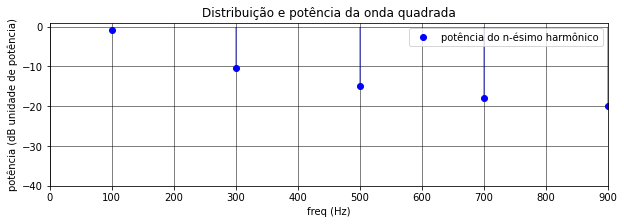

In [72]:
An[An<1e-2] = 0
PdBu = 10*log10((abs(An)**2)/2)

# plota gráficos
plt.figure()
plt.plot(xf, PdBu,'bo',label = 'potência do n-ésimo harmônico')
plt.vlines(xf, 0, PdBu,'b', alpha=0.5)

plt.title('Distribuição e potência da onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
plt.ylim(-40,)
plt.xlabel('freq (Hz)')
plt.ylabel('potência (dB unidade de potência)');

Observando o gráfico acima, vemos que a potência do componente fundamental está próxima a 0 dB, ou seja, indicando que o seu valor de potência é próximo ao valor unitário na unidade de potência considerada (i.e. $10\log_{10}(1)=0~dB$). O quinto harmônico, por sua vez, possui potência -20 dB, indicando que seu valor de potência é um centésimo da unidade considerada (i.e. $10\log_{10}(1/100)=-20~dB$). Veja que esta informação sobre os níveis relativos de potência entre componentes de frequência não é clara quando observamos o gráfico na escala linear. 

### Ocupação de banda

O intervalo de frequências que um dado sinal ocupa é um parâmetro de muita importância em engenharia de comunicações, uma vez que a grande maioria dos sistemas de comunicações dispõe de um espectro de frequências limitado para transmissão e recepção de informação. Nesse contexto, é necessário definir métricas para quantificar a largura de banda (ou ocupação de banda) de sinais. 

A largura de banda de um sinal é uma medida associada ao intervalo de frequências em que a potência/energia do sinal está concentrada. Nesse aspecto, considerando sinais passa-baixas e passa-faixas, o conceito mais difundido é o conceito da largura de banda de 3 dB. Nesse caso, a largura de banda constitui o intervalo entre a frequência central de um sinal, que possui o maior nível de potência, até a frequência cuja potência está exatamente 3 dB abaixo da potência do componente central. Partindo do mesmo princípio, podemos definir *banda de 6 dB*, *banda de 10 dB*, *banda de 20 dB*, etc.  Essa metodologia para definir a banda de sinais, entretanto, é difícil de ser generalizada. Isto porque **diversas formas de espectro em que a frequência central não é a mais energética** podem aparecer em sistemas de comunicações.

Uma forma mais geral de definir o conceito de banda é determinar o intervalo de frequências em que a maior parte da potência do sinal (> 90%) está contida. No gráfico abaixo, a composição percentual da potência de cada componente harmônico da série de Fourier da onda quadrada está ilustrada. Veja que mais de 90% da potência está contida nos dois primeiros harmônicos. Desse modo, podemos afirmar que a banda contendo $\approx$ 90% da energia desse sinal é 300 Hz.


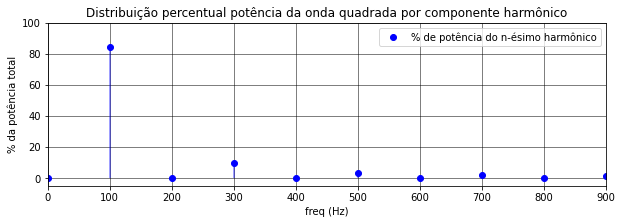

In [73]:
Ptot  = np.sum((abs(An)**2)/2) # potência total
Pharm = (abs(An)**2)/2         # vetor com a potência individual por harmônico

# plota gráficos
plt.figure()
plt.plot(xf, (Pharm/Ptot)*100,'bo',label = '% de potência do n-ésimo harmônico')
plt.vlines(xf, 0, (Pharm/Ptot)*100,'b', alpha=0.5)

plt.title('Distribuição percentual potência da onda quadrada por componente harmônico')
plt.legend()
plt.xlim(0,xf.max(0))
plt.ylim(-5,100)
plt.xlabel('freq (Hz)')
plt.ylabel('% da potência total');